Logistic Regression

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [12]:
# Load the dataset
df = pd.read_csv('Heart_Disease_Prediction (1).csv')

In [13]:
# Feature selection: Assuming you have all the necessary features
X = df.drop('Heart Disease', axis=1) 
y = df['Heart Disease']  

In [14]:
df.shape

(270, 14)

In [15]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [17]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [18]:
# Convert 'ST depression' column from float to int
df['ST depression'] = df['ST depression'].astype(int)

# Verify the conversion
print(df.dtypes)

Age                         int64
Sex                         int64
Chest pain type             int64
BP                          int64
Cholesterol                 int64
FBS over 120                int64
EKG results                 int64
Max HR                      int64
Exercise angina             int64
ST depression               int32
Slope of ST                 int64
Number of vessels fluro     int64
Thallium                    int64
Heart Disease              object
dtype: object


In [19]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

Accuracy: 0.8272
Precision: 0.8750
Recall (Sensitivity): 0.6562
F1-Score: 0.7500
ROC-AUC: 0.8839
Confusion Matrix:
 [[46  3]
 [11 21]]

Classification Report:
               precision    recall  f1-score   support

     Absence       0.81      0.94      0.87        49
    Presence       0.88      0.66      0.75        32

    accuracy                           0.83        81
   macro avg       0.84      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81



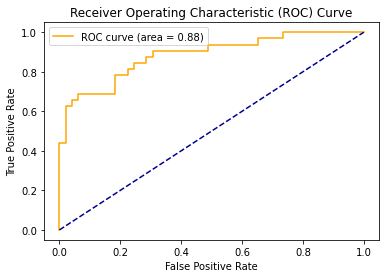

In [24]:
# Performance Evaluation
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision
precision = precision_score(y_test, y_pred, pos_label='Presence') 
print(f"Precision: {precision:.4f}")

# 3. Recall (Sensitivity)
recall = recall_score(y_test, y_pred, pos_label='Presence')
print(f"Recall (Sensitivity): {recall:.4f}")

# 4. F1-Score (F-Measure)
f1 = f1_score(y_test, y_pred, pos_label='Presence')
print(f"F1-Score: {f1:.4f}")

# 5. ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion matrix and classification report for more details
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Presence')
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [26]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Predict on the test set
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC

In [28]:
# Performance Evaluation
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision
precision = precision_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"Precision: {precision:.4f}")

# 3. Recall (Sensitivity)
recall = recall_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"Recall (Sensitivity): {recall:.4f}")

# 4. F1-Score (F-Measure)
f1 = f1_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"F1-Score: {f1:.4f}")

# 5. ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.7160
Precision: 0.6667
Recall (Sensitivity): 0.5625
F1-Score: 0.6102
ROC-AUC: 0.6894


In [29]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     Absence       0.74      0.82      0.78        49
    Presence       0.67      0.56      0.61        32

    accuracy                           0.72        81
   macro avg       0.70      0.69      0.69        81
weighted avg       0.71      0.72      0.71        81



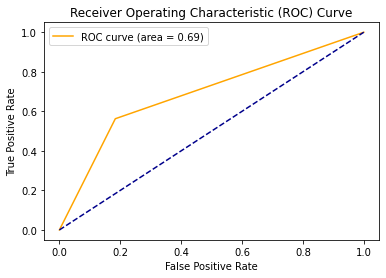

In [30]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Presence')
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

In [33]:
# Performance Evaluation
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision
precision = precision_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"Precision: {precision:.4f}")

# 3. Recall (Sensitivity)
recall = recall_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"Recall (Sensitivity): {recall:.4f}")

# 4. F1-Score (F-Measure)
f1 = f1_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"F1-Score: {f1:.4f}")

# 5. ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.7654
Precision: 0.7600
Recall (Sensitivity): 0.5938
F1-Score: 0.6667
ROC-AUC: 0.8779


In [34]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     Absence       0.77      0.88      0.82        49
    Presence       0.76      0.59      0.67        32

    accuracy                           0.77        81
   macro avg       0.76      0.74      0.74        81
weighted avg       0.76      0.77      0.76        81



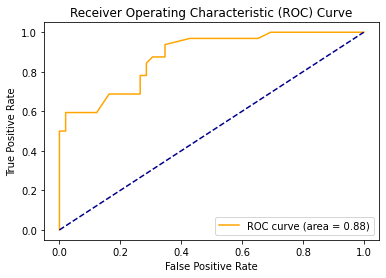

In [35]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Presence')
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

KNN

In [36]:
# Feature Scaling (KNN works better with normalized features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)
y_pred_prob = knn_classifier.predict_proba(X_test_scaled)[:, 1]

In [38]:
# Performance Evaluation
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision
precision = precision_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"Precision: {precision:.4f}")

# 3. Recall (Sensitivity)
recall = recall_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"Recall (Sensitivity): {recall:.4f}")

# 4. F1-Score (F-Measure)
f1 = f1_score(y_test, y_pred, pos_label='Presence')  # Use 'Presence' as pos_label
print(f"F1-Score: {f1:.4f}")

# 5. ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.7901
Precision: 0.8000
Recall (Sensitivity): 0.6250
F1-Score: 0.7018
ROC-AUC: 0.8938


In [39]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     Absence       0.79      0.90      0.84        49
    Presence       0.80      0.62      0.70        32

    accuracy                           0.79        81
   macro avg       0.79      0.76      0.77        81
weighted avg       0.79      0.79      0.78        81



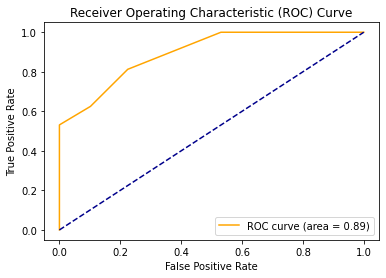

In [40]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Presence')
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

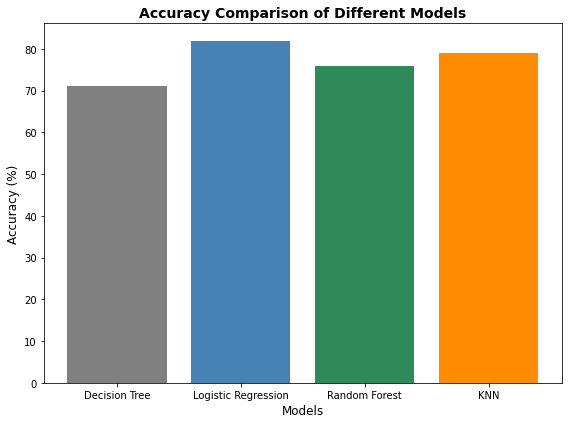

In [41]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'KNN']
accuracies = [71, 82, 76, 79]

# Colors suited for research paper
colors = ['gray', 'steelblue', 'seagreen', 'darkorange']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=colors)

# Add titles and labels
plt.title('Accuracy Comparison of Different Models', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Show plot
plt.tight_layout()  # Adjust the layout to look better
plt.show()

In [42]:
print(f"Accuracy of Logistic Regression: 82.72%")
print(f"Accuracy of KNN: 79.01%")
print(f"Accuracy of Random Forest: 76.54%")
print(f"Accuracy of Decision Tree: 71.60%")

Accuracy of Logistic Regression: 82.72%
Accuracy of KNN: 79.01%
Accuracy of Random Forest: 76.54%
Accuracy of Decision Tree: 71.60%
